# OCR_paddle

In [5]:
import pandas as pd
import numpy as np
import os
import json
import pprint
import glob

import tensorflow as tf
import cv2
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

import paddleocr
from paddleocr import PaddleOCR, draw_ocr
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [11]:
ocr_model = PaddleOCR(lang = 'korean')

img_path = '2ali6i.jpg'
result = ocr_model.ocr(img_path, cls = False)

for res in result:
    print(res[1][0])

[2024/08/26 20:47:22] ppocr DEBUG: Namespace(alpha=1.0, alphacolor=(255, 255, 255), benchmark=False, beta=1.0, binarize=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\UserK/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\UserK/.paddleocr/whl\\det\\ml\\Multilingual_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model

In [12]:
print(result)

[[[[[130.0, 152.0], [550.0, 77.0], [569.0, 181.0], [149.0, 255.0]], ('Riseppointed', 0.8323544859886169)], [[[69.0, 214.0], [364.0, 214.0], [364.0, 334.0], [69.0, 334.0]], ('BUT', 0.8771654963493347)], [[[429.0, 209.0], [729.0, 220.0], [724.0, 342.0], [425.0, 332.0]], ('N요T', 0.7563906311988831)], [[[331.0, 356.0], [620.0, 308.0], [632.0, 377.0], [343.0, 425.0]], ('SURPRISE', 0.9809025526046753)]]]


In [13]:
res = result[0]
print(type(res))
boxes = [res[i][0] for i in range(len(result[0]))] # 
texts = [res[i][1][0] for i in range(len(result[0]))]
scores = [float(res[i][1][1]) for i in range(len(result[0]))]

<class 'list'>


In [14]:
texts

['Riseppointed', 'BUT', 'N요T', 'SURPRISE']

In [ ]:
# JSON 파일 로드 함수
def load_json(json_path):
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

# 이미지 전처리 함수
def preprocess_image(image_path, bounding_box):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    x1, y1, x2, y2 = bounding_box
    cropped_image = image[y1:y2, x1:x2]
#     print('crop')
    resized_image = cv2.resize(cropped_image, (128, 32))  # CRNN 입력 크기에 맞게 조정
    normalized_image = resized_image / 255.0
    return normalized_image

data = load_json('data/HW_OCR/4.Validation/P.Paper/R.Free/IMG_OCR_53_4PR_21045.json')
image_path = 'data/' + data['Dataset']['src_path'] + data['Images']['identifier'] + '.' + data['Images']['type']


# 각 단어의 바운딩 박스와 텍스트 정보
words_info = data['bbox']
texts_list = []
bounding_box_list = []

# 전처리된 이미지 리스트
processed_images = []
for word in words_info:
    text = word['data']
    texts_list.append(text)
    print(text)
    # x, y, x+w, y+h
    bounding_box = [word['x'][0], word['y'][0], word['x'][2], word['y'][1]]
    bounding_box_list.append(bounding_box)
    print(bounding_box)

    processed_image = preprocess_image(image_path, bounding_box)
    processed_images.append(processed_image)

In [ ]:
texts_list

In [ ]:
# predict > texts
# json > texts_list

print('< 예측 | 실제 > ')
for predict, real in zip(texts, texts_list):
    print('{} | {}'.format(predict, real))

In [ ]:
# os.listdir('C:/Windows/Fonts')

[[130.0, 152.0], [550.0, 77.0], [569.0, 181.0], [149.0, 255.0]]
Riseppointed
0.8323544859886169


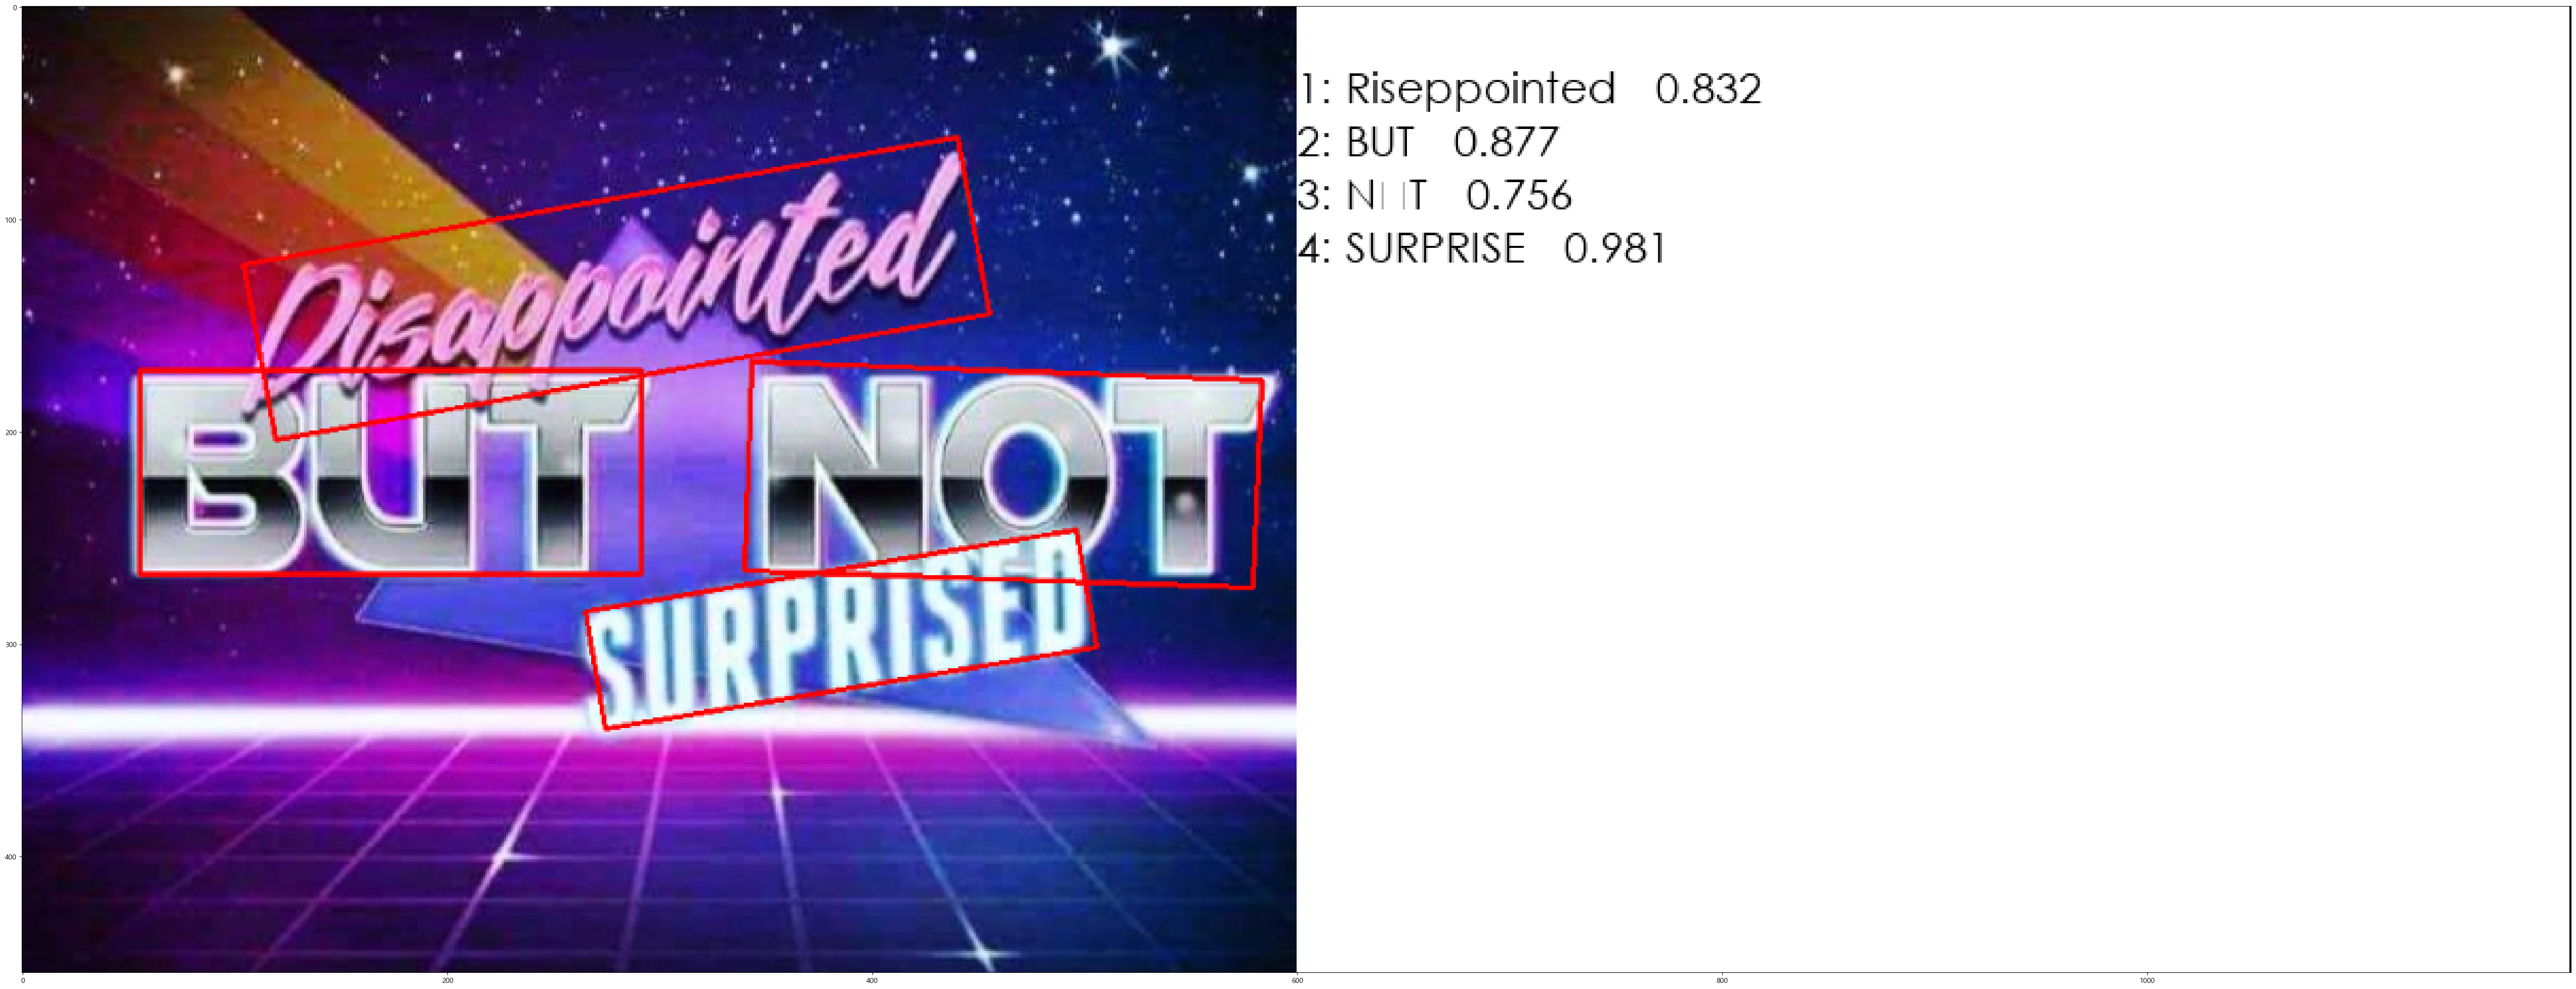

In [16]:
#for res in result:
print(boxes[0])
print(texts[0])
print(scores[0])#, Text: {res[1]}

# Specifying font path for draw_ocr method
font_path = 'C:/Windows/Fonts/GOTHIC.TTF'

img_path = 'C:/Users/UserK/ds_study/DL_proj/2ali6i.jpg'

# imports image
img = cv2.imread(img_path) 

# reorders the color channelsa
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

# Visualize our image and detections
# resizing display area
plt.figure(figsize=(65,65))

# draw annotations on image
annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path) 

# show the image using matplotlib
plt.imshow(annotated)

In [2]:
import cv2
import numpy as np

# 이미지 파일 경로를 확인하세요.
image_path = 'C:/Users/UserK/ds_study/DL_proj/test.png'

# 이미지 파일이 존재하는지 확인하세요.
try:
    with open(image_path, 'r'):
        pass
except FileNotFoundError:
    print(f'파일을 찾을 수 없습니다: {image_path}')
    exit()

# 이미지를 불러옵니다.
image = cv2.imread(image_path)

# 이미지가 제대로 불러와졌는지 확인합니다.
if image is None:
    print(f'이미지를 불러오는 데 실패했습니다: {image_path}')
    exit()

# 이미지를 BGR에서 RGB로 변환합니다.
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)